# Lending Club Case Study

<hr>
<font color = blue>
    Initial Program
    <ul>
        <li> Importing the relevant dependencies/libraries and read the raw loan.csv file
    </ul>
</font>
<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_loan = pd.read_csv("loan/loan.csv", delimiter=",", header='infer', na_filter = False, low_memory=False)
print(f"Printing Dataframe shape: {str(df_loan.shape)}")
df_loan.head()

Printing Dataframe shape: (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NA,NA,NA,NA,0,0,NA,NA,NA,NA
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NA,NA,NA,NA,0,0,NA,NA,NA,NA
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NA,NA,NA,NA,0,0,NA,NA,NA,NA
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NA,NA,NA,NA,0,0,NA,NA,NA,NA
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NA,NA,NA,NA,0,0,NA,NA,NA,NA


### Drop Unwanted Columns
<hr>
<font color = blue>
    <ul>
        <li>  Drop Columns with All Null/Nan Values <br>
        <li>  Drop Columns with only one distinct value i.e. ['NA', '0', 'INDIVIDUAL']  <br>
    </ul>
</font>
<hr>

In [2]:
df_clean_all_nan = df_loan
raw_count = df_loan.shape[0]
drop_count = 0
dropped_col_list = []
print("Dropping columns with all Null/Nan values or only one/two distinct Value")
other_columns = [
    'collections_12_mths_ex_med', 'tax_liens' # has only two values 0 and NA
]
for column, datatype in zip(df_loan.columns, df_loan.dtypes):
    check_all_nan_val = df_clean_all_nan[[column]].value_counts()
    check_all_nan = len(check_all_nan_val)
    if check_all_nan <= 1 or column in other_columns:
        print(f"Dropping column {column}[{datatype}] with distinct count [{str(check_all_nan)}] and distinct value['{df_clean_all_nan[column].unique()[0]}'']" )
        del df_clean_all_nan[column]
        drop_count += 1
        dropped_col_list.append(column)

Dropping columns with all Null/Nan values or only one/two distinct Value
Dropping column pymnt_plan[object] with distinct count [1] and distinct value['n'']
Dropping column initial_list_status[object] with distinct count [1] and distinct value['f'']
Dropping column collections_12_mths_ex_med[object] with distinct count [2] and distinct value['0'']
Dropping column mths_since_last_major_derog[object] with distinct count [1] and distinct value['NA'']
Dropping column policy_code[int64] with distinct count [1] and distinct value['1'']
Dropping column application_type[object] with distinct count [1] and distinct value['INDIVIDUAL'']
Dropping column annual_inc_joint[object] with distinct count [1] and distinct value['NA'']
Dropping column dti_joint[object] with distinct count [1] and distinct value['NA'']
Dropping column verification_status_joint[object] with distinct count [1] and distinct value['NA'']
Dropping column acc_now_delinq[int64] with distinct count [1] and distinct value['0'']
Dro

<hr>
<font color = blue>
    Some Validations for the Dropped Columns
    <ul>
        <li>  Check if Drop columns was successful
        <li>  Display list of dropped columns
    </ul>
</font>
<hr>

In [3]:
print("Total Number of columns Dropped: " + str(drop_count))
print(f"Note: {str((111 - drop_count))} columns should remain in the dataframe.")
print(f"df_clean_all_nan Dataframe count : {str(raw_count)}")
print(str(df_clean_all_nan.shape) + "\n")
print("Dropped Column List: " + str(dropped_col_list))

Total Number of columns Dropped: 62
Note: 49 columns should remain in the dataframe.
df_clean_all_nan Dataframe count : 39717
(39717, 49)

Dropped Column List: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats'

In [4]:
print("Displaying Column Datatypes: ")
df_clean_all_nan.dtypes

Displaying Column Datatypes: 


id                            int64
member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                         object
int_rate                     object
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
mths_since_last_delinq      

## Initial Data Cleansing primary attributes, adding derived attributes and filters
<hr>
<font color = blue >
    Below columns were handled
    <ul>
        <li>  <b>term</b> - Converted to int
        <li>  <b>int_rate</b> - Converted to float
        <li>  <b>int_rate_bucket</b> - Added new column to create buckets for int_rate 
        <li>  <b>annual_inc</b> - Deleted annual_inc and added annual_inc_k with income in thousands (k)
        <li>  <b>emp_length</b> - Converted to float and replaced '&lt; 1 year' with .5 and '10+ years' with 10. NOTE: Using an upper limit of 10 here as there is no exact data post 10 years
        <li>  <b>url</b> - Dropped 'url' column as the data seems redundant
        <li>  <b>revol_util</b> - Converted to float. Since all loans with Null revol_util are either closed or charged off, null values were replaced with 0
        <li>  <b>pub_rec_bankruptcies </b> - Converted to int and converted 'NA' to 0 as no records is equivalent to 0
        <li>  <b>mths_since_last_delinq </b> - Converted to int and converted 'NA' to 0 as no records is equivalent to 0
        <li>  <b>mths_since_last_record </b> - Converted to int and converted 'NA' to 0 as no records is equivalent to 0
        <li>  <b>issue_d </b> - Converted to date
        <li>  <b>earliest_cr_line </b> - Converted to date
        <li>  <b>earliest_cr_line_years </b> - Added with number of years difference between  issue_d and earliest_cr_line
    </ul>
</font>
</hr>

In [5]:
def fn_date_convert(date_time):
    date = datetime.strptime(date_time, '%b-%y').strftime("%Y-%m")
    return date

df_clean = df_clean_all_nan.copy()
df_clean['term'] = df_clean['term'].apply(lambda x: int(x.replace(' months', '')) )
df_clean['int_rate'] = df_clean['int_rate'].apply(lambda x: float(str(x).replace('%','')) )
df_clean['emp_length'] = df_clean['emp_length'].str.replace('< 1', '0.5').replace('n/a', '0')
df_clean['emp_length'] = df_clean['emp_length'].apply(lambda x: float(''.join([num if num.isdigit() or num == '.' else "" for num in x])) )
df_clean['revol_util'] = df_clean['revol_util'].apply(lambda x: float(x.replace('%','') if x != '' else 0) )
df_clean['annual_inc_k'] = df_clean['annual_inc'].apply(lambda x: round(x/1000,2) )
df_clean['pub_rec_bankruptcies'] = df_clean['pub_rec_bankruptcies'].apply(lambda x: int(str(x).replace('NA','0')) )
df_clean['mths_since_last_delinq'] = df_clean['mths_since_last_delinq'].apply(lambda x: int(str(x).replace('NA','0')) )
df_clean['mths_since_last_record'] = df_clean['mths_since_last_record'].apply(lambda x: int(str(x).replace('NA','0')) )
df_clean['issue_d'] = df_clean['issue_d'].apply(lambda x: fn_date_convert(x))
df_clean['earliest_cr_line'] = df_clean['earliest_cr_line'].apply(lambda x: fn_date_convert(x))
df_clean['earliest_cr_line_years'] = (pd.DatetimeIndex(df_clean['issue_d']).year - \
                                      pd.DatetimeIndex(df_clean['earliest_cr_line']).year)
df_clean['earliest_cr_line_years'] = df_clean['earliest_cr_line_years'].apply(lambda x: 0 if x < 0 else x )
df_clean['int_rate_bucket'] = pd.cut(
    df_clean['int_rate'], 
    bins=[0,3,6,9,12,15,18,21,24,27], 
    labels=['<3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24+'])

for column in ['url', 'annual_inc']:
    del df_clean[column]

# Validate a few rows post data cleansing
df_clean[['term','int_rate', 'int_rate_bucket', 'emp_length', 'annual_inc_k', 'revol_util', 'pub_rec_bankruptcies', 
          'mths_since_last_delinq', 'mths_since_last_record', 'issue_d', 'earliest_cr_line', 'earliest_cr_line_years']].head(100)

,term,int_rate,int_rate_bucket,emp_length,annual_inc_k,revol_util,pub_rec_bankruptcies,mths_since_last_delinq,mths_since_last_record,issue_d,earliest_cr_line,earliest_cr_line_years
0,36,10.65,9-12,10.0,24.00,83.70,0,0,0,2011-12,1985-01,26
1,60,15.27,15-18,0.5,30.00,9.40,0,0,0,2011-12,1999-04,12
2,36,15.96,15-18,10.0,12.25,98.50,0,0,0,2011-12,2001-11,10
3,36,13.49,12-15,10.0,49.20,21.00,0,35,0,2011-12,1996-02,15
4,60,12.69,12-15,1.0,80.00,53.90,0,38,0,2011-12,1996-01,15
5,36,7.90,6-9,3.0,36.00,28.30,0,0,0,2011-12,2004-11,7
6,60,15.96,15-18,8.0,47.00,85.60,0,0,0,2011-12,2005-07,6
7,36,18.64,18-21,9.0,48.00,87.50,0,0,0,2011-12,2007-01,4
8,60,21.28,21-24,4.0,40.00,32.60,0,0,0,2011-12,2004-04,7
9,60,12.69,12-15,0.5,15.00,36.50,0,0,0,2011-12,2004-09,7


## Initial Univariate Analysis on ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
<hr>
<font color = blue >
    Since 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' are similar columns with similar range of values, plotting them as a single graph
    <br>
    NOTE: This analysis considers the entire sample of records
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  Approved/Investor Funded amounts have a 50th quartile of 9600/8975 and a mean of 10947.71/10397.44. The outliers are not causing a big skew between the 50th quartile and mean.
        <li>  Outlier counts of 1265/1293 seem insignificant compared to overall sample count of 38577. Any additional filtering if required on outliers will be addressed base on impact of skewness determined in further analysis
        <li>  funded_amnt ranges from 500 to 35000
        <li>  116 rows had [funded_amnt &lt; total_rec_prncp] but the difference was less than a dollar. Hence no data cleansing was done on these rows
        <li>  Initial look into the data shows that [minimum funded_amnt_inv == 0] which looks like a discrepancy/data issue since an unfunded loan should not have a status of Charged Off or Paid Off
        <li>  Number of rows with [funded_amnt_inv &lt; total_rec_prncp] was found to be 16696. Since 16696 is sizeable sample of records, and since funded_amnt is more in line with total_rec_prncp, 
no corrections will be done for the funded_amnt_inv funded_amnt will be used for future analysis to check for the probability of delinquency        
            
</font>
</hr>

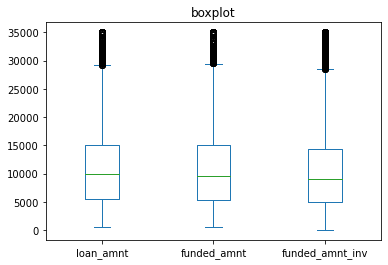

,loan_amnt,funded_amnt,funded_amnt_inv
count,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868
std,7456.670694,7187.238670,7128.450439
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,8975.000000
75%,15000.000000,15000.000000,14400.000000
max,35000.000000,35000.000000,35000.000000


In [6]:
df_clean[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].plot(kind='box', title='boxplot')
plt.show()
df_clean[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe()

In [7]:
funded_amnt_outlier_count = df_clean[df_clean['funded_amnt'] > 27000].shape[0]
funded_amnt_inv_outlier_count = df_clean[df_clean['funded_amnt_inv'] > 27000].shape[0]
sample_count = df_clean.shape[0]

print(f"Sample Size: {sample_count}")
print(f"funded_amnt outlier count and percentage: {str(funded_amnt_outlier_count)}[{str(round(funded_amnt_outlier_count/sample_count*100,2))}]%")
print(f"funded_amnt_inv outlier count and percentage: {str(funded_amnt_inv_outlier_count)}[{str(round(funded_amnt_inv_outlier_count/sample_count*100,2))}]%")

# Outlier counts of 1268/1202 seem insignificant compared to overall sample count of 38577. 
# Any additional filtering if required on outliers will be addressed base on impact of skewness determined in further analysis

Sample Size: 39717
funded_amnt outlier count and percentage: 1265[3.19]%
funded_amnt_inv outlier count and percentage: 1193[3.0]%


In [8]:
df_funded_amt_check = df_clean[(df_clean['funded_amnt'] < df_clean['total_rec_prncp'])]
print(f"Number of rows with funded_amnt < total_rec_prncp : {df_funded_amt_check.shape[0]}")

df_funded_amt_check = df_funded_amt_check[abs(df_funded_amt_check['funded_amnt'] - df_funded_amt_check['total_rec_prncp']) < 1]
print(f"Number of rows with funded_amnt < total_rec_prncp but difference is less than a dollar : {df_funded_amt_check.shape[0]}")

print("\n# NOTE: Since difference was less than a dollar, hence no data cleansing was done on these 116 rows")

Number of rows with funded_amnt < total_rec_prncp : 116
Number of rows with funded_amnt < total_rec_prncp but difference is less than a dollar : 116

# NOTE: Since difference was less than a dollar, hence no data cleansing was done on these 116 rows


In [9]:
print(f"Count of rows where funded_amnt_inv == 0: {str( df_clean[df_clean['funded_amnt_inv'] == 0].shape[0] )}")

df_inv_amt_check = df_clean[(df_clean['funded_amnt_inv'] < df_clean['total_rec_prncp'])]
print(f"Number of rows with funded_amnt_inv < total_rec_prncp : {df_inv_amt_check.shape[0]}")

print(f"""
# NOTE: 
Since {df_inv_amt_check.shape[0]} is sizeable sample of records, and since funded_amnt is more in line with total_rec_prncp, 
no corrections will be done for the funded_amnt_inv 
funded_amnt will be used for future analysis to check for the probability of delinquency 
""")

Count of rows where funded_amnt_inv == 0: 129
Number of rows with funded_amnt_inv < total_rec_prncp : 16696

# NOTE: 
Since 16696 is sizeable sample of records, and since funded_amnt is more in line with total_rec_prncp, 
no corrections will be done for the funded_amnt_inv 
funded_amnt will be used for future analysis to check for the probability of delinquency 



## Initial Univariate Analysis on other Amount/Numeric/Ratio Columns
<hr>
<font color = blue >
    <br>
    NOTE: This analysis considers the entire sample of records to assess how loans are being funded across all loan_status
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>Columns with Several Unique values</b> -  ['installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
        <li>  <b>Columns found as categorical</b> - ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies']</li>
        </ul>
    The above columns will be considered analysis in further sections. All columns are correctly inferred as int/float            
            
</font>
</hr>

In [10]:
num_col_list = ['installment', 'annual_inc_k', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'pub_rec_bankruptcies', 'earliest_cr_line_years']

for column in num_col_list:
    print(f"Total unique values for column {column} with dtype[{df_clean.dtypes[column]}]: {len(pd.unique(df_clean[column]))}")

Total unique values for column installment with dtype[float64]: 15383
Total unique values for column annual_inc_k with dtype[float64]: 4317
Total unique values for column dti with dtype[float64]: 2868
Total unique values for column delinq_2yrs with dtype[int64]: 11
Total unique values for column inq_last_6mths with dtype[int64]: 9
Total unique values for column mths_since_last_delinq with dtype[int64]: 95
Total unique values for column mths_since_last_record with dtype[int64]: 111
Total unique values for column open_acc with dtype[int64]: 40
Total unique values for column pub_rec with dtype[int64]: 5
Total unique values for column revol_bal with dtype[int64]: 21711
Total unique values for column revol_util with dtype[float64]: 1089
Total unique values for column total_acc with dtype[int64]: 82
Total unique values for column out_prncp with dtype[float64]: 1137
Total unique values for column out_prncp_inv with dtype[float64]: 1138
Total unique values for column total_pymnt with dtype[flo

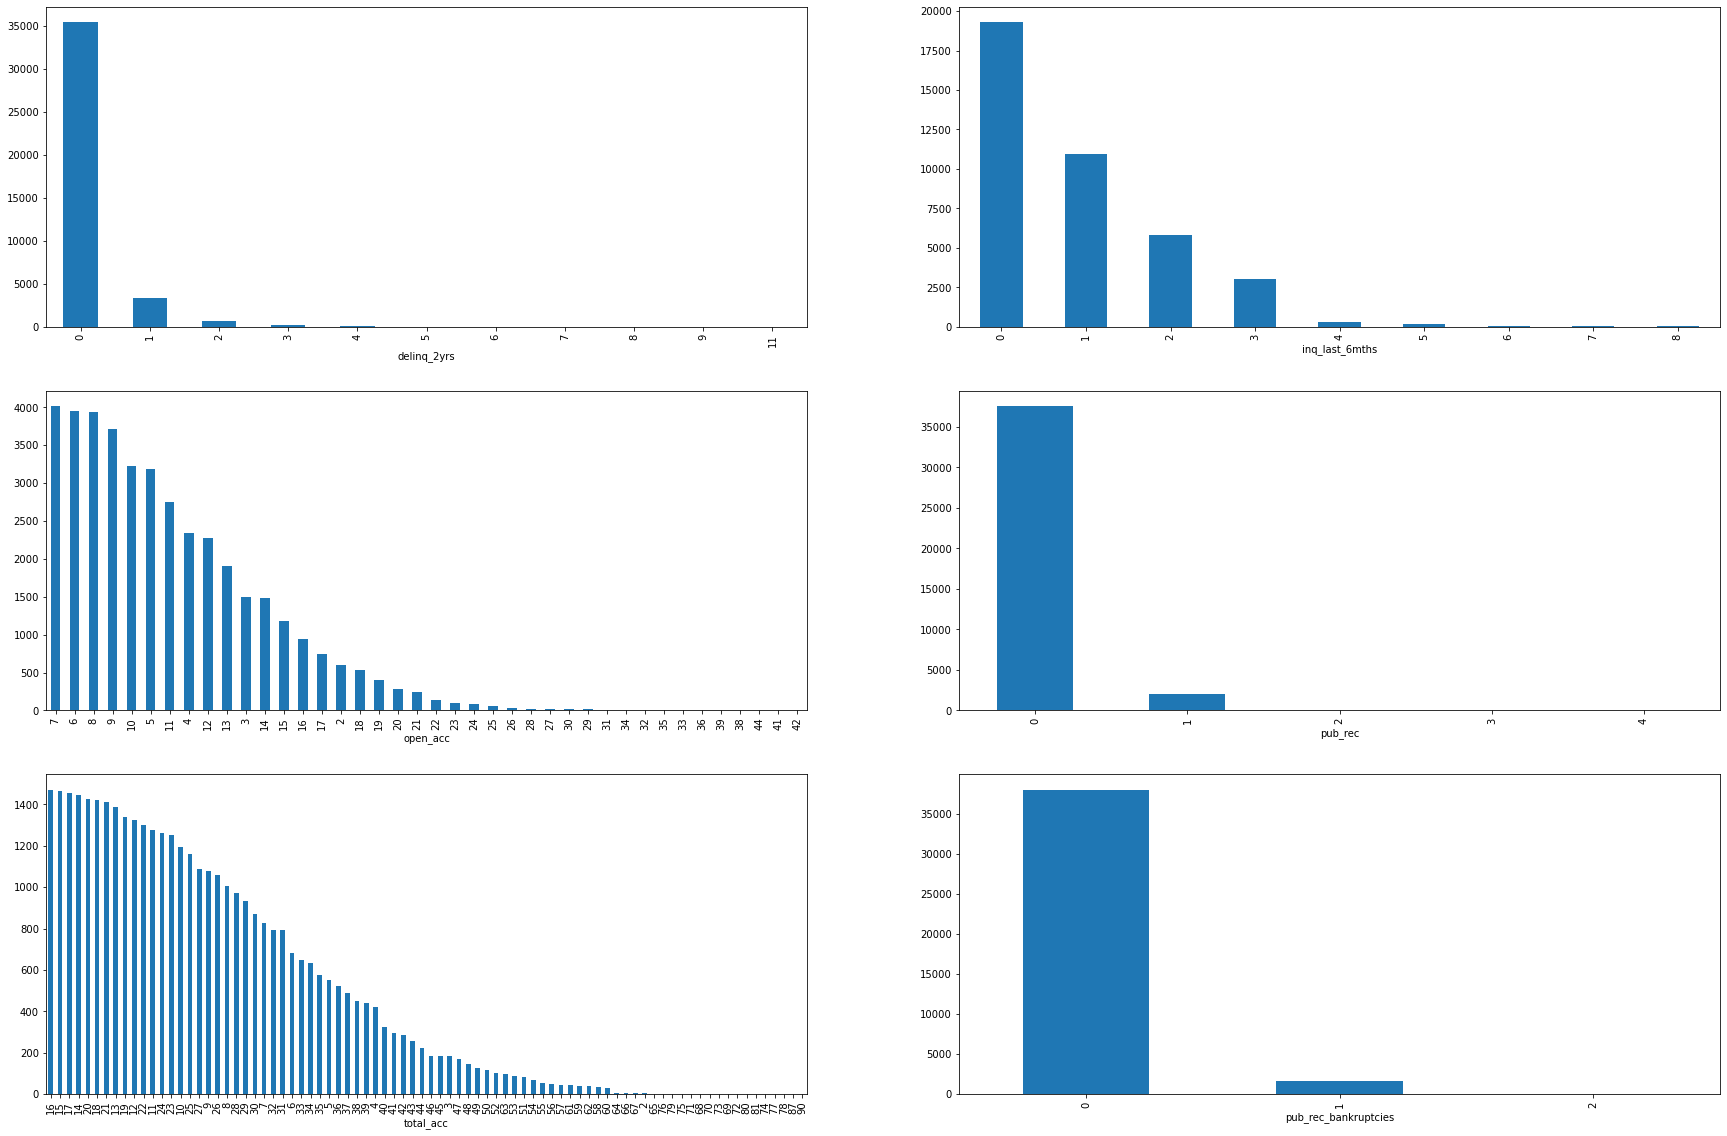

In [11]:
# The below columns are numeric but have a low distinct count and hence may be categorical. 
num_cat_col_list = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies']

list_len = len(num_cat_col_list)

ncol = 2 
fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(30,20))

for column, index in zip(num_cat_col_list, range(len(num_cat_col_list))):
    ax = df_clean[column].value_counts().plot(kind='bar', ax=axes[index//ncol,index%ncol])
    ax.set_xlabel(column)

plt.show()

## Initial Univariate Analysis on other categorical columns
<hr>
<font color = blue >
    This analysis of this section was done on some readily evident categorical columns
    <br>
    NOTE: This analysis considers the entire sample of records to assess how loans are being funded across all loan_status
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>term</b> - Majority of customers prefer a shorter term loan
        <li>  <b>int_rate</b> - Majority of the loans have an interest rate between 6% to 18%. Highest number of loans were issued between 9% to 12% and 2nd highest is between 12% to 15%. This indicates most investors are willing to take on high risk while lending. Fewer investors prefer rates between 0 to 6 % due to lower yield and rates above 18% due to significantly high risk 
        <li>  <b>grade</b> - Higher grades are preferred by investors as the probability of default is lower. Most preferred grade is B
        <li>  <b>sub_grade</b> - Higher sub grades are preferred by investors as the probability of default is lower. Most preferred grade is B3 and A4
        <li>  <b>emp_length</b> - Most Investors prefer loan applicants with more than 10 years of employment history
        <li>  <b>home_ownership</b> - Most loan applicants have a mortgage or are staying on rent which is a possible indicator that most applicants are already in debt before applying for the loan
        <li>  <b>verification_status</b> - Most investors are ok to fund applicants whose income has not been verified. This might be an indicator that investors are preferring other categories (say rates, loan_status history etc) over this category.
        <li>  <b>loan_status</b> - Most loans are paid off which is good indicator for both Lending Club as well as investors.
        <li>  <b>purpose</b> - Majority of applicants are applying for loans for service existing debt. Top two categories are debt_consolidation and credit_card. This indicates most applicants and investors are taking on high risk
        <li>  <b>addr_state</b> - Top two states where most loans are funded are CA and NY. This could because of high cost of living or high per capita debt in these states. Another possibility is Lending Club's market penetration can be improved in states with lower applicants.
</font>
</hr>

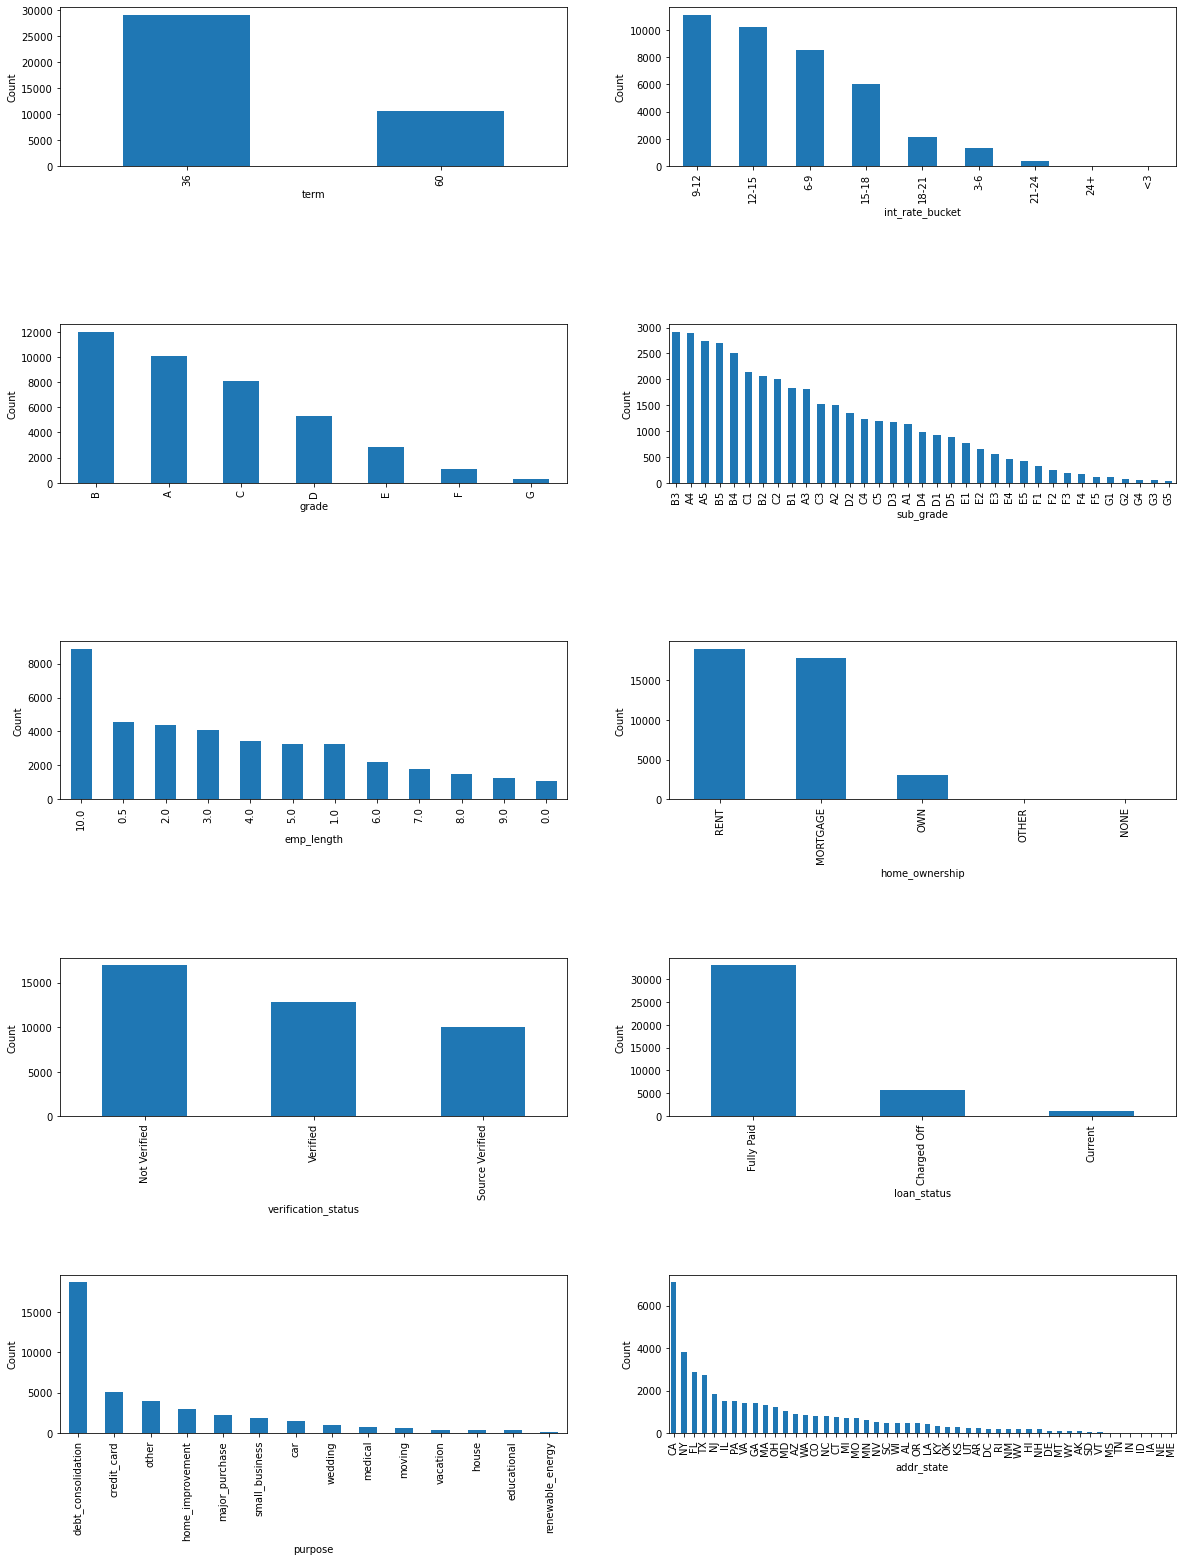

In [12]:
cat_col_list = ['term', 'int_rate_bucket', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                'loan_status', 'purpose', 'addr_state']
list_len = len(cat_col_list)

ncol = 2 
fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(20,20))

for column, index in zip(cat_col_list, range(len(cat_col_list))):
    ax = df_clean[column].value_counts().plot(kind='bar', ax=axes[index//ncol,index%ncol])
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

plt.subplots_adjust(top = 1, bottom=0.01, hspace=1, wspace=0.2)
plt.show()


## Initial Univariate Analysis on Some Continuous Variables
<hr>
<font color = blue >
    This analysis of this section was done on some readily evident continuous variables/attributes
    <br>
    NOTE: This analysis considers the entire sample of records to assess how loans are being funded across all loan_status
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>loan_amnt and funded_amnt</b> - Majority of requested and approved loan amounts are between 400 to 15000
        <li>  <b>int_rate</b> - Majority of the loans have an interest rate between 6% to 18% as determined earlier.
        <li>  <b>dti</b> - dti has a gradual incline up to 15 and a gradual decline till 25 post which it is flat. 
        <li>  <b>annual_inc_k</b> - Has big outliers. Majority of borrowers have incomes ranging from 40K to 82K 
        <li>  <b>revol_bal</b> - Declines exponentially
        <li>  <b>total_acc</b> - Majority of total_acc are between 13 to 29
        <li>  <b>total_pymnt and total_pymnt_inv</b> - Are correlated as expected
        <li>  <b>total_rec_prncp and total_rec_int</b> - No significant conclusions yet
</font>
</hr>

In [13]:
df_clean[['annual_inc_k']].describe()

,annual_inc_k
count,39717.000000
mean,68.968946
std,63.793755
min,4.000000
25%,40.400000
50%,59.000000
75%,82.300000
max,6000.000000


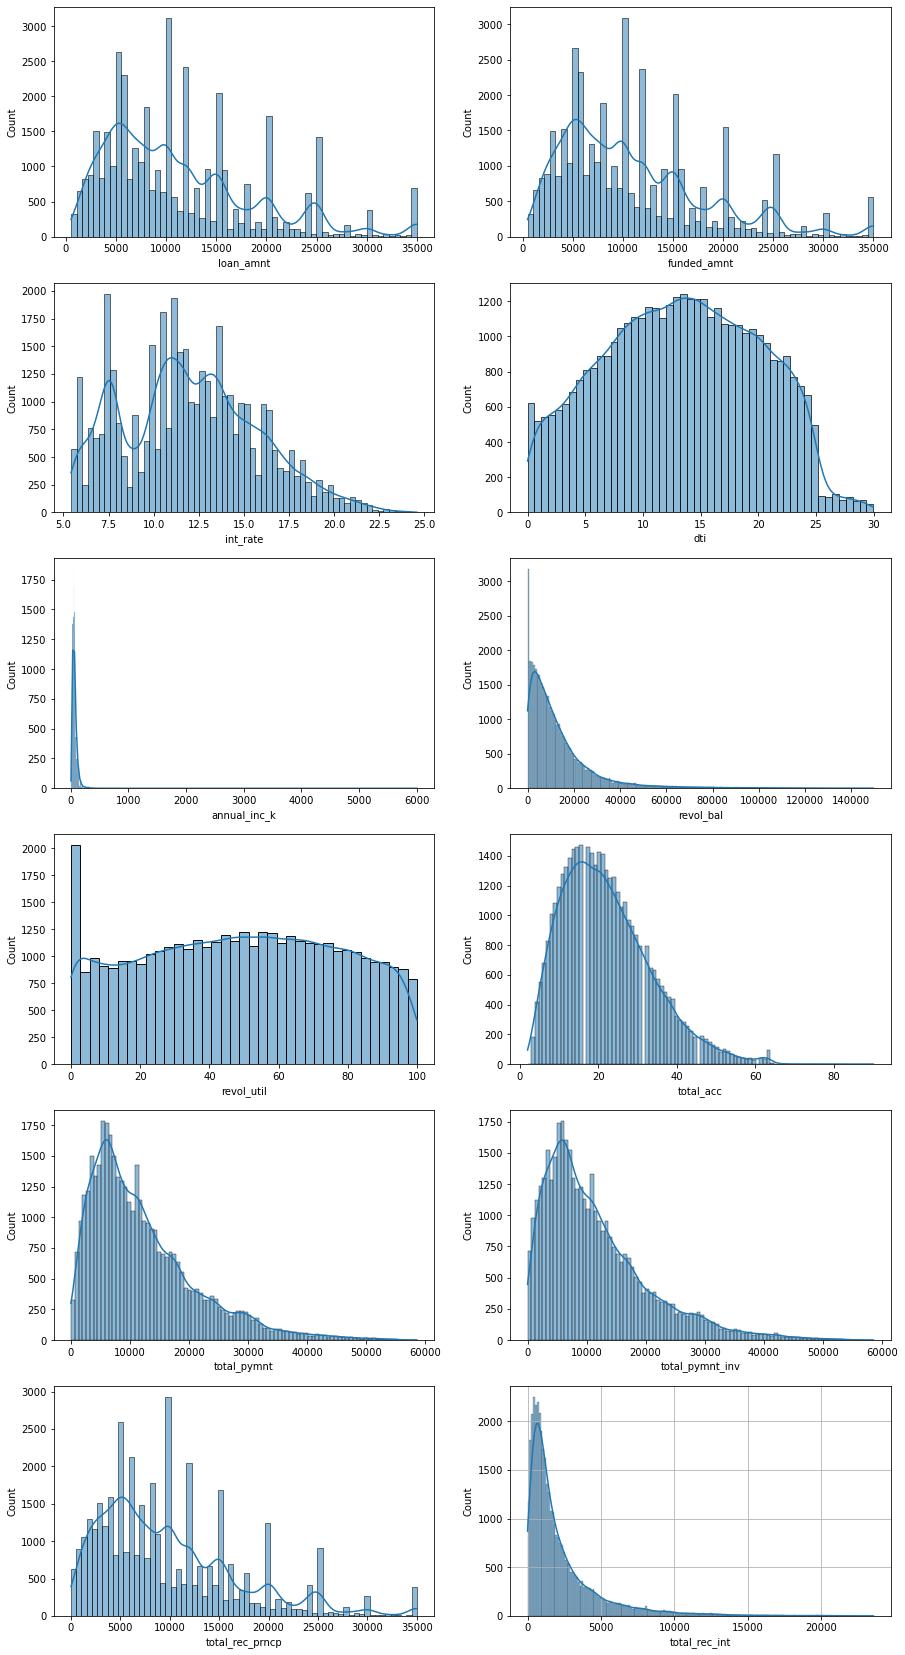

In [14]:
cont_col_list = ['loan_amnt', 'funded_amnt', 'int_rate','dti','annual_inc_k', 'revol_bal', 'revol_util' , 'total_acc',
                'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']

# Define distplot function to loop through list of columns
def fn_dist_plot(df, col_list, ncol):
    list_len = len(col_list)

    fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(15,15))

    for column, index in zip(col_list, range(len(col_list))):
        ax = sns.histplot(df[column], ax=axes[index//ncol,index%ncol], kde=True)

    plt.subplots_adjust(top = 1.5, bottom=0.01, hspace=.2, wspace=0.2)
    plt.ticklabel_format(style='plain', axis='y',useOffset=False)
    plt.grid()
    plt.show()
    
fn_dist_plot(df_clean, cont_col_list, 2)

## CREATE: create dataframes based on loan_status
<hr>
<font color = blue >
    <ul>
        <li>  <b>df_current</b> - Where 'loan_status' == 'Current'
        <li>  <b>df_non_current</b> - Where 'loan_status' != 'Current'
    </ul>
    # NOTE: <br>
    df_non_current will be used for most of the analysis on delinquency <br>
    df_current will be used for predicting delinquincy based on the above analysis <br>
</font>
<hr>

In [15]:
# Create Current and Non-Current dataframes
df_current = df_clean[df_clean['loan_status'] == 'Current']
df_non_current = df_clean[df_clean['loan_status'] != 'Current']
print("df_current shape: " + str(df_current.shape))
print("df_non_current shape: " + str(df_non_current.shape))


df_current shape: (1140, 50)
df_non_current shape: (38577, 50)


## Segmented Univariate Analysis:  Delinquency based on Categorical columns
<hr>
<font color = blue >
    Potential attributes which could strongly help predict delinquncy/payoff are highlighted as [Good Criteria]
    <br>
    NOTE: This analysis considers only non-current data where 'loan_status' != 'Current'
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>term</b> - Probablity of paying off the loan is more if the term is less. But, Delinquency may not be accurately predicted by this attribute alone.
        <li>  <b>int_rate_bucket [Good Criteria]</b> - Most pay-off and delinquencies are between 6% to 15%. However, ratio of payoff vs delinqunecy increases after 12%
        <li>  <b>grade [Good Criteria]</b> - Highest payoffs are for A and B as one would expect. Delinquency ratio to loans funded rises as we move from A to F as expected. Grade seems like a robust standalone criteria for predicting outcome.
        <li>  <b>sub_grade [Good Criteria]</b> - Same as grades since this is a subset and outcomes are as one would expect.
        <li>  <b>emp_length</b> - Probability of both delinquency and pay-off is high for applicants with more than 10 years of employment. However, this may not be an accurate guess as data for 10+ years could have been classified into further bins but this data is unavailable. Volume of payoffs/delinquency is more for &lt; 5 years and &gt; 10 years 
        <li>  <b>home_ownership [Good Criteria]</b> - Probability of default is less of applicant owns a house. But loan volume is also comparatively low
        <li>  <b>verification_status</b> - Not sufficient to predict outcome. There is a high loan volume for 'Not Verified' which indicates that Lending Club should look into verfication for these applicants
        <li>  <b>loan_status</b> - Most loans are paid off which is good indicator for both Lending Club as well as investors.
        <li>  <b>purpose [Good Criteria]</b> - Majority of applicants are applying for loans for service existing debt (debt_consolidation and credit_card). Likelyhood of predicting a default is high
        <li>  <b>addr_state</b> - Top three states where most defaults happen CA, NY and FL. This could because of high cost of living or high per capita debt in these states. </li>
        </ul>
NOTE: Attributes not classified as good predictors of delinquency/payoff may still be useful if clubbed with other attributes
</font>
</hr>

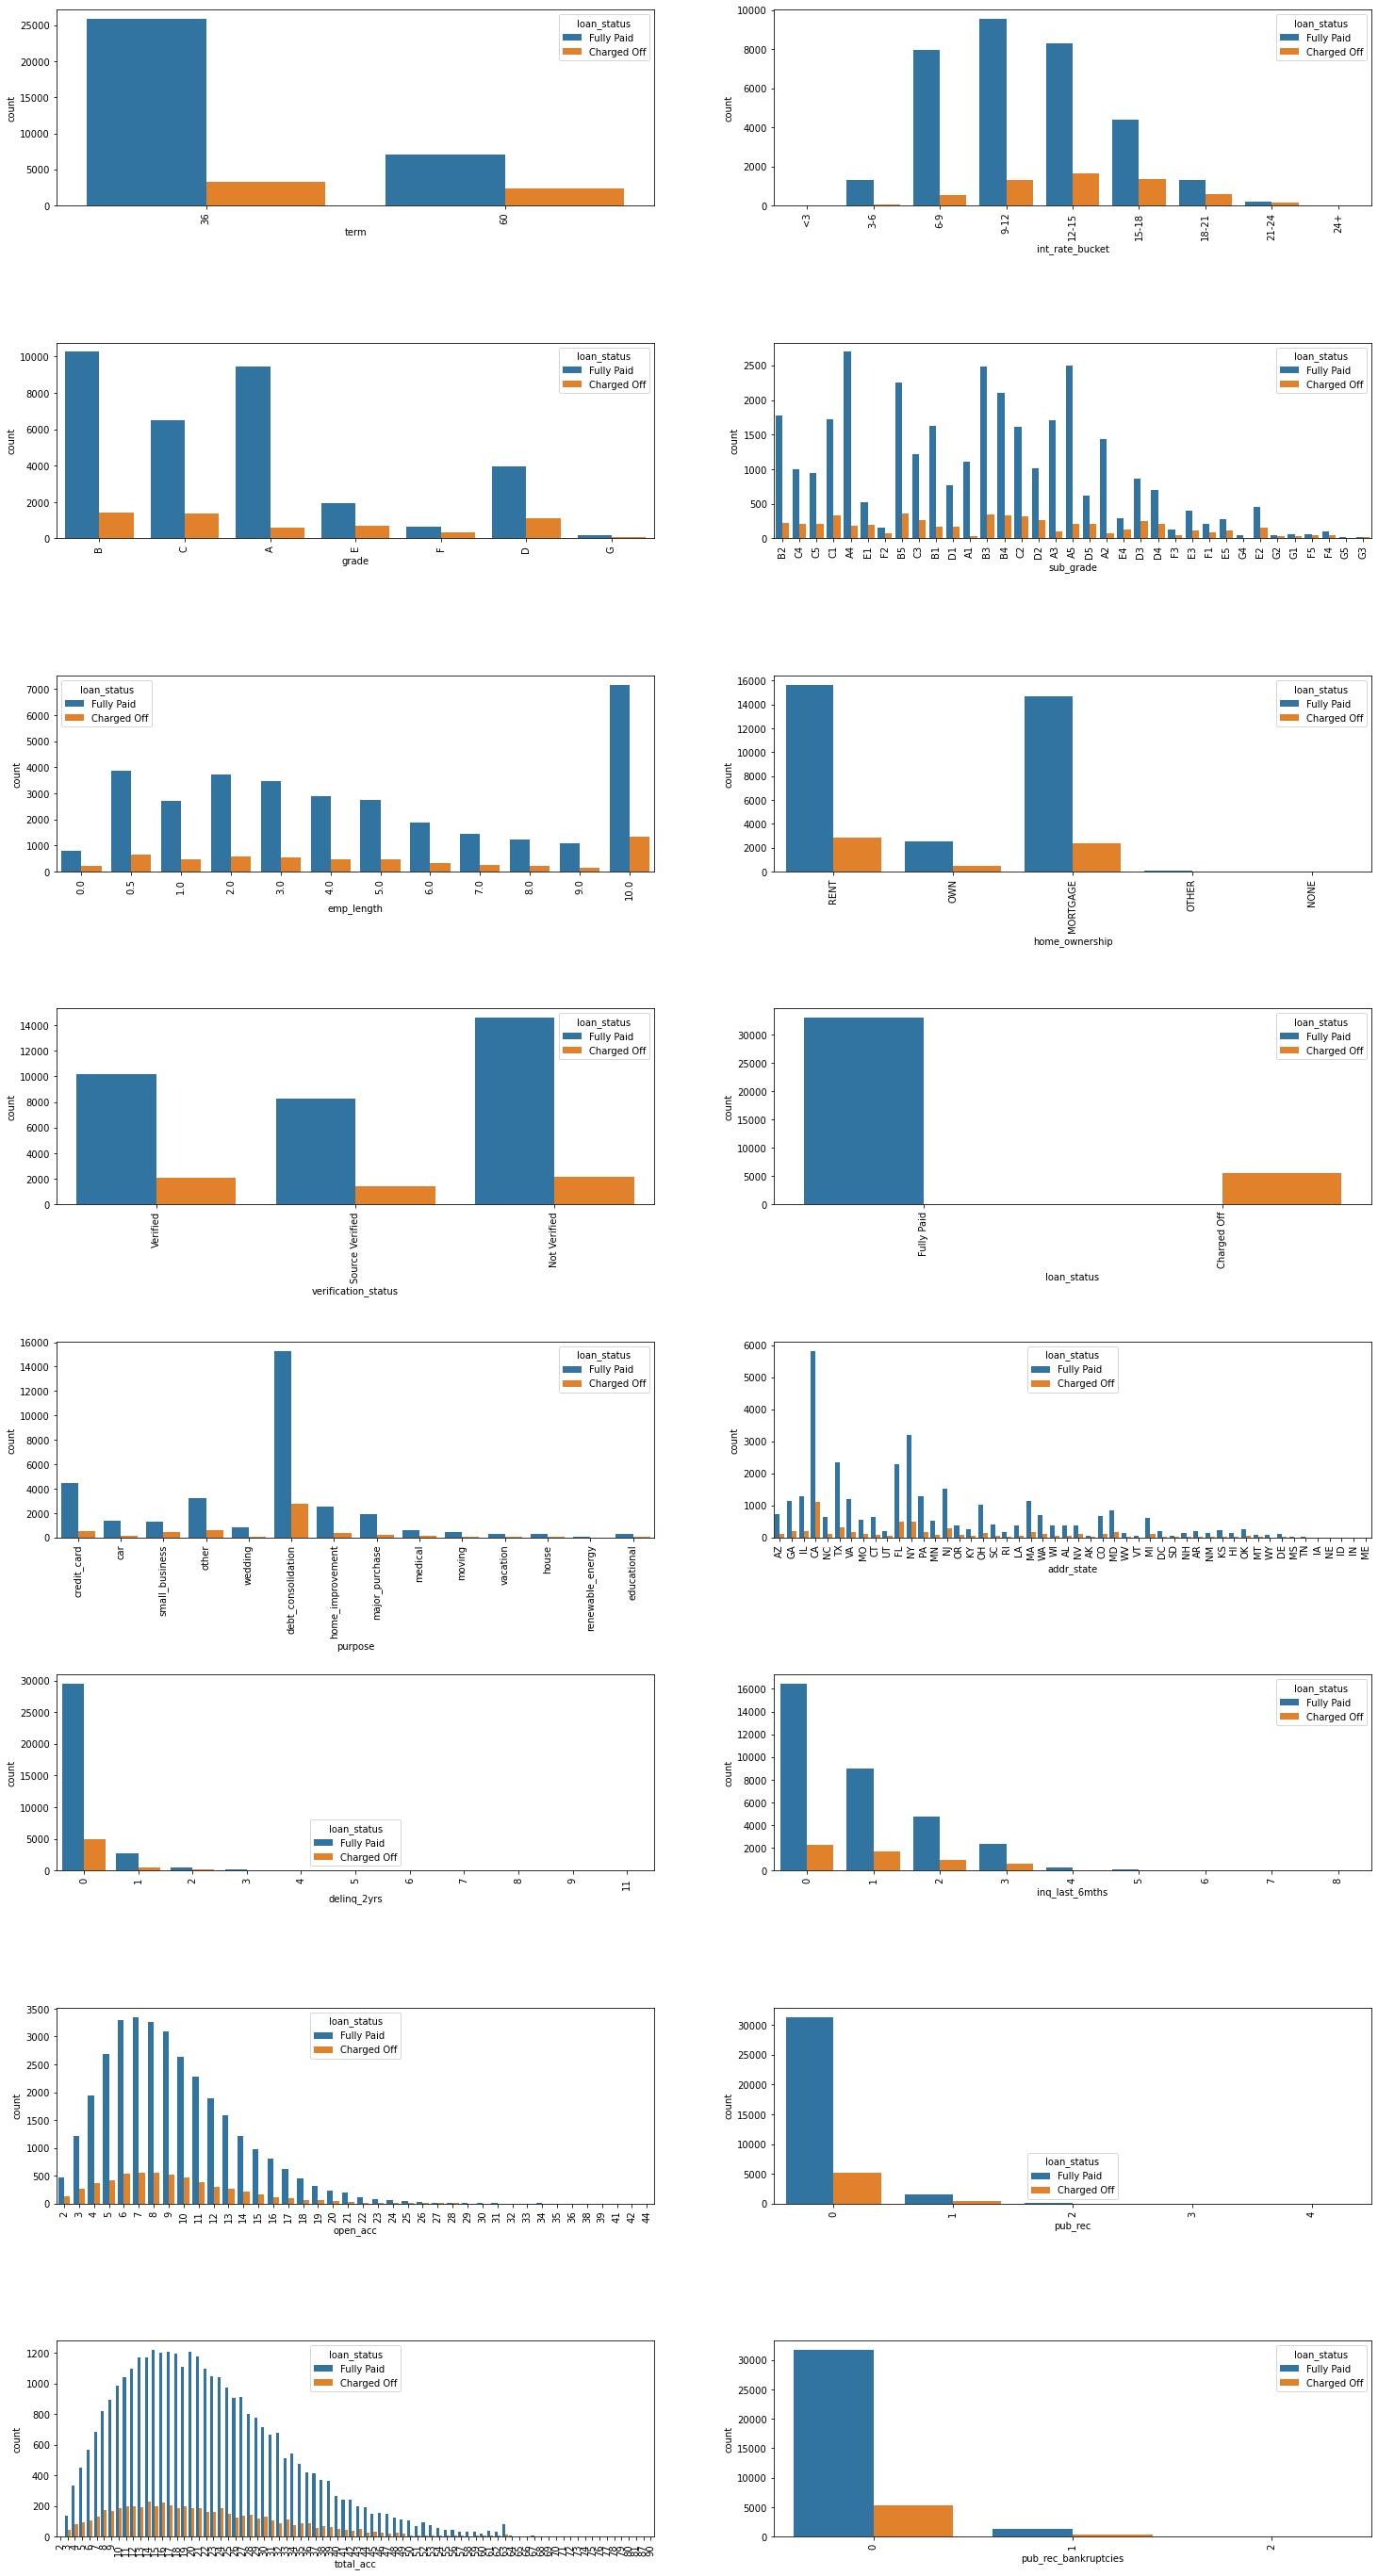

In [16]:
# Define countplot function to loop through list of columns
def fn_subplot_countplot(df, col_list, ncol, hue):
    list_len = len(col_list)

    fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(25,25))

    for column, index in zip(col_list, range(len(col_list))):
        ax = sns.countplot(x=column, hue=hue, data=df, ax=axes[index//ncol,index%ncol])
        axes[index//ncol,index%ncol].tick_params(axis='x', rotation=90)

    plt.subplots_adjust(top = 1.5, bottom=0.01, hspace=.7, wspace=0.2)
    plt.show()

cat_col_list = ['term', 'int_rate_bucket', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
                'verification_status', 'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 
                'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies']
fn_subplot_countplot(df_non_current, cat_col_list, 2, "loan_status")

## Segmented Univariate Analysis:  Delinquency based on Continuous columns
<hr>
<font color = blue >
    Potential attributes which could strongly help predict delinquency/payoff are highlighted as [Good Criteria]
    <br>
    NOTE: This analysis considers only non-current data where 'loan_status' != 'Current'
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>funded_amnt</b> - Chances of default increases with funded_amount. But this not a good predictor alone. Perhaps, higher amounts should not be loaned if other factors determine possibility of default.
        <li>  <b>dti [Good Criteria]</b> - As expected, a higher dti ratio may lead to default and this is a good predictor
        <li>  <b>annual_inc_k [Good Criteria]</b> - As expected, higher incomes lead to less default. This is also a good criteria 
        <li>  <b>revol_bal </b> - Moderate chance of default if revolving balance is more but not a good criteria
        <li>  <b>revol_util [Moderate Criteria]</b> - Good chance of default if the revol_util is high. Note that this could be a good predictor of default only once the loan is current and a few payments have been made. This information may not be available prior to loan is disbursed.
        <li>  <b>total_acc </b> - Moderate chance of default if total accounts is less but not a good criteria
        <li>  <b>total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int</b> - Cannot be used as a predictor as a portion of the payments will not be made in case of default</li>
        </ul>
NOTE: Some applicant behaviours take effect after the loan is provided and hence may not be used accurately to predict outcomes of new loans
</font>
</hr>

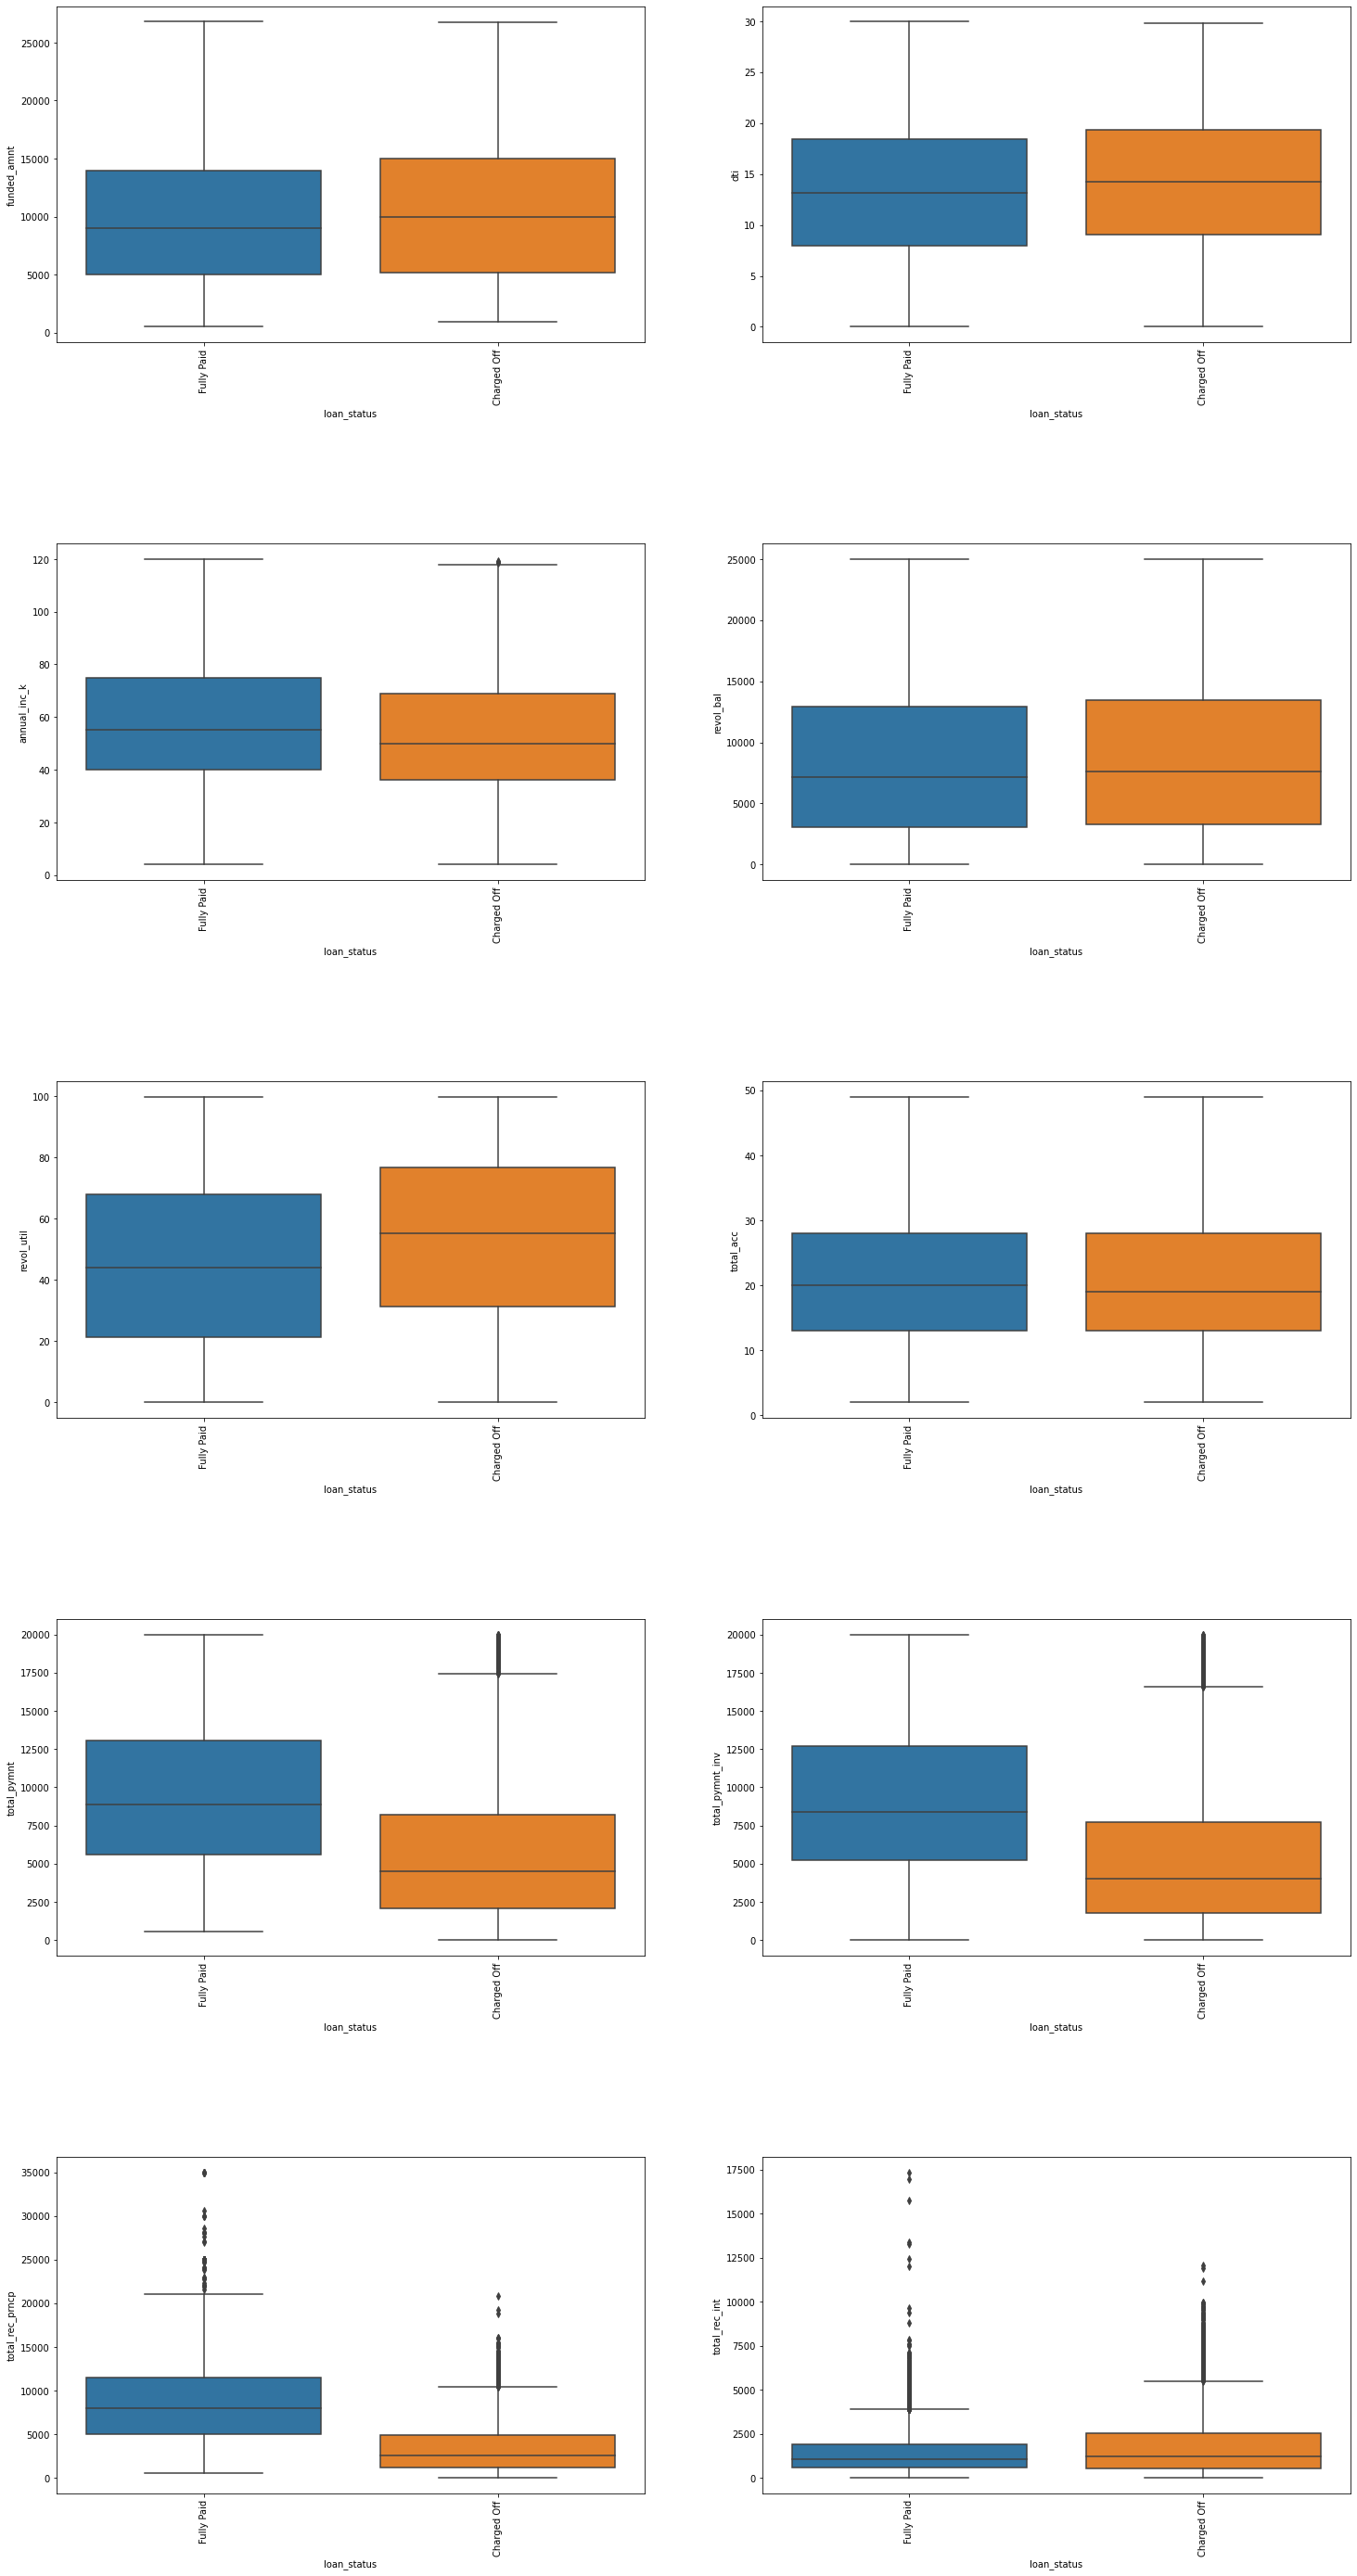

In [17]:
# Define boxplot function to loop through list of columns
def fn_boxplot_countplot(df, col_list, ncol, x, filter_list, hue):
    list_len = len(col_list)

    fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(25,25))

    for column, index in zip(col_list, range(len(col_list))):
        # Note outliers are filtered based initial sampling of data using this same function. 
        # Only extreme cases of outliers were considered for the filters.
        if filter_list != 'NA':
            if filter_list[index] != 0:
                df_filtered = df[df[column] < filter_list[index]]
        else:
            df_filtered = df
        if hue == 'NA':
            ax = sns.boxplot(data=df_filtered,x=x, y=column, ax=axes[index//ncol,index%ncol])
        else:
            ax = sns.boxplot(data=df_filtered,x=x, y=column, hue=hue, ax=axes[index//ncol,index%ncol])
        axes[index//ncol,index%ncol].tick_params(axis='x', rotation=90)

    plt.subplots_adjust(top = 1.5, bottom=0.01, hspace=.6, wspace=0.2)
    plt.show()

cont_col_list = ['funded_amnt', 'dti','annual_inc_k', 'revol_bal', 'revol_util' , 'total_acc',
                'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']
outlier_limit_list = [27000, 0, 120, 25000, 0, 50, 20000, 20000 ,0 ,0]

fn_boxplot_countplot(df_non_current, cont_col_list, 2, "loan_status", outlier_limit_list, 'NA')

## Bivariate Analysis: On Continuous/Numeric Columns
<hr>
<font color = blue >
    The [Good Criteria] Continious columns [annual_inc_k, dti, revol_util] seem to predict the credit worthiness of the applicant. This analysis will figure out the correlation of these columns compared to other continuous attributes
    <br>
    NOTE: This analysis considers data <br>
    1. where 'loan_status' != 'Current' <br>
    2. where 'loan_status' == 'Charged Off'
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>funded_amnt vs annual_inc_k</b> - are positively correlated which is good. Loan approval should factor in annual income. However, Correlation increases for Charged Off loans. 
        <li>  <b>funded_amnt vs dti</b> - This ratio seems low (including defaults) indicating dti is not a major factor in approving higher loan amount. Perhaps this needs to factor in more while approving loans
        <li>  <b>funded_amnt vs emp_length</b> - Ratio is positive but is comparitively low indicating that employment length may not be a major criteria for loan approval
        <li>  <b>pub_rec_bankruptcies and pub_rec</b> - Correlation of these attributes are low which is preferred. This indicates less loans are approved with applicants having derogatory public records or history of bankruptcy
        </ul>
    # NOTE: Some high correlations are ignored as they are obvious
</font>
</hr>

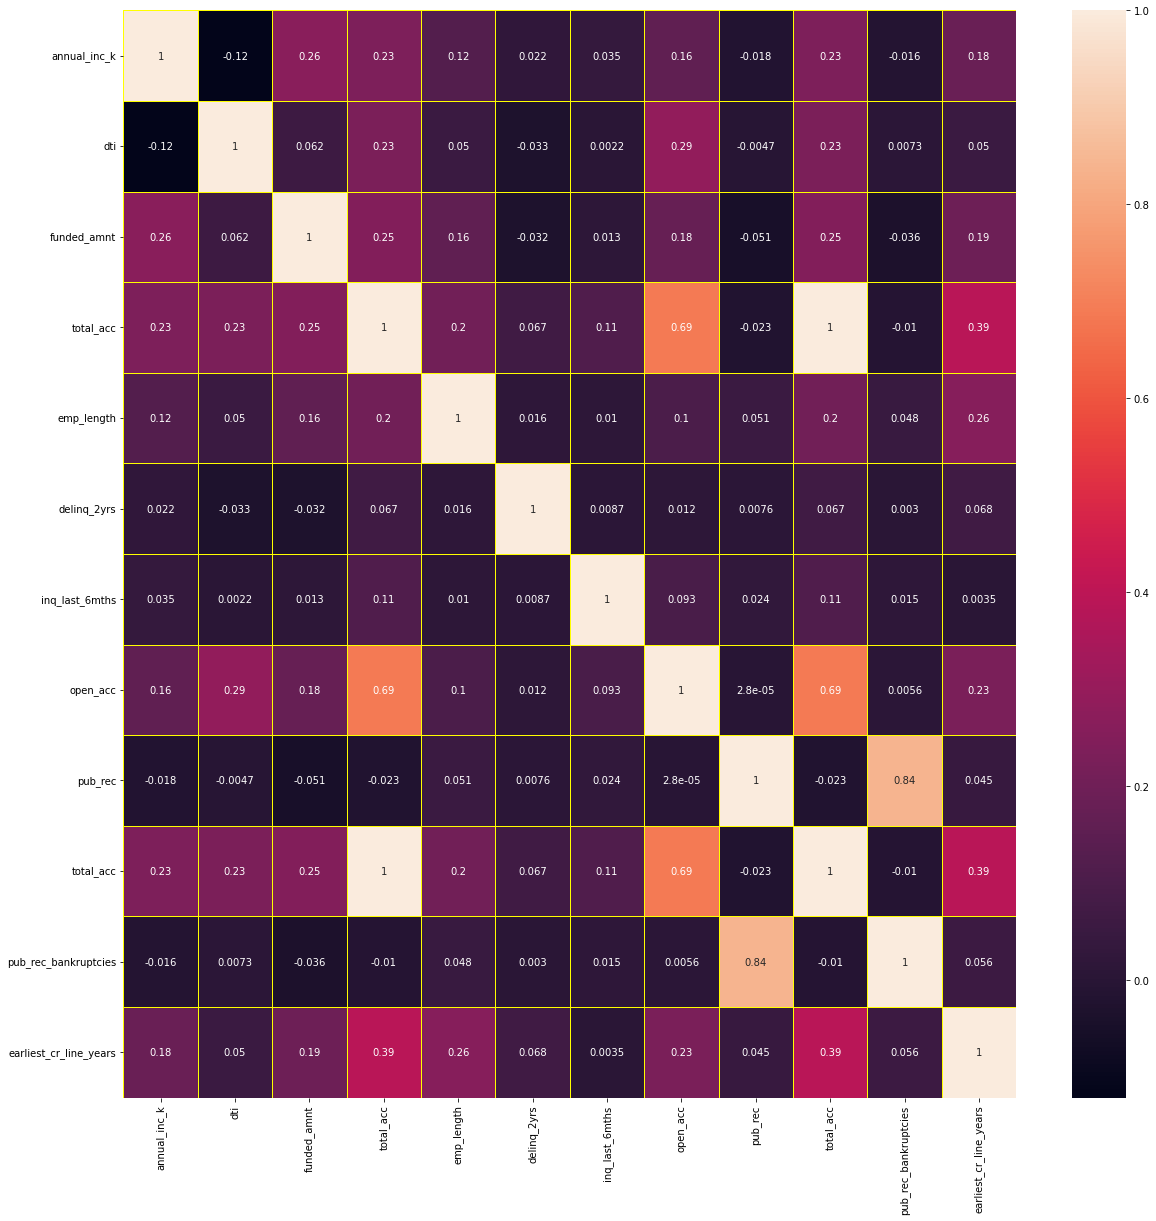

In [18]:
# Generate Heat Map where 'loan_status' != 'Current'
cont_good_col_list = ['annual_inc_k', 'dti']
other_col_list = ['funded_amnt', 'total_acc', 'emp_length', 'delinq_2yrs', 
                  'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'earliest_cr_line_years']

plt.figure(figsize=(20,20))
sns.heatmap(df_non_current[cont_good_col_list + other_col_list].corr(), annot=True, linewidths=1, linecolor='yellow')
plt.show()

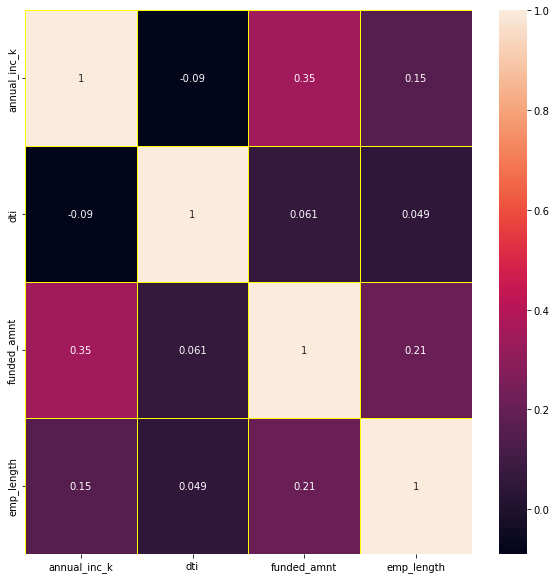

In [19]:
# Generate Heat Map where 'loan_status' != 'Charged Off'
cont_good_col_list = ['annual_inc_k', 'dti']
other_col_list = ['funded_amnt', 'emp_length']

plt.figure(figsize=(10,10))
sns.heatmap(df_non_current[df_non_current['loan_status'] == 'Charged Off'][cont_good_col_list + other_col_list].corr(), annot=True, linewidths=1, linecolor='yellow')
plt.show()

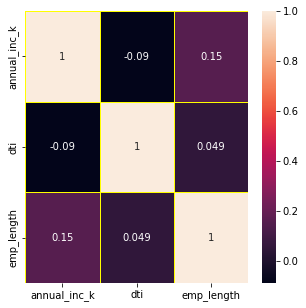

In [20]:
# Create HeatMap Plot after filtering outliers from annual income
plt.figure(figsize=(5,5))
sns.heatmap(df_non_current[
    (df_non_current['loan_status'] == 'Charged Off')]
    [['annual_inc_k', 'dti', 'emp_length']].corr(), annot=True, linewidths=1, linecolor='yellow')

plt.show()

## Bivariate Analysis: On Categorical Columns 
<hr>
<font color = blue >
    The [Good Criteria] categorical columns identified above for delinquency/payoff is used for bivariate analysis on other columns
    <br>
    NOTE: This analysis considers only non-current data where 'loan_status' != 'Current'
    <br><br>
    <b>INFERENCE: </b>
        <ul>
        <li>  <b>annual_inc_k vs int_rate_bucket</b> - Higher Interest rate is a stronger candidate for default than income.
        <li>  <b>annual_inc_k vs grade</b> - Higher grade is a stronger candidate for default than income as already guessed.
        <li>  <b>annual_inc_k vs home_ownership </b> Highest default still shows for Mortgages despite higher income
        <li>  <b>annual_inc_k vs purpose</b> We earlier saw most of defaults were happening for debt consolidation and credit cards. Within the sub-categories of home improvement and small businesses, defaults are high.
        <li>  <b>dti vs int_rate_bucket</b> Defaults increases with interest rates as dti increases
        <li>  <b>dti vs grade</b> higher dti may have higher defaults
        <li>  <b>dti vs home_ownership</b> Higher defaults are seen as dti increases for Loan, Rent and Mortgage
        <li>  <b>dti vs purpose</b> high for or debt consolidation and credit cards. Loans taken for education purpose happen even for lower dti.
        <li>  <b>funded_amnt vs int_rate_bucket</b> - Higher Interest rate increases with funded amount as guessed earlier. However, for interest rate greater than 18%, the funded amount seems to increase along with high defaults.  Reduced funded amounts can be considered for such categories to reduce default
        <li>  <b>funded_amnt vs grade</b> - Same conclusion as int_rate_bucket
        <li>  <b>funded_amnt vs home_ownership</b> - Consistent with earlier findings but reduced funded amount can be considered for 'Other' category as funded amounts seem high along with defaults
        <li>  <b>funded_amnt vs purpose</b> - Funded amount seems high for debt consolidation, credit cards and small businesses. Reduced funded amounts can be considered for such categories to reduce default
</ul>

</font>
</hr>

In [ ]:
# Filter outliers from income
df_income = df_non_current[df_non_current['annual_inc_k'] < 120]

fig, axes = plt.subplots(2, 2, figsize=(25,25))

# Generate Box Plots for annual_inc_k
ax = sns.boxplot(data=df_income, x='annual_inc_k', y='int_rate_bucket', hue='loan_status', ax=axes[0][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='annual_inc_k', y='grade', hue='loan_status', 
                 order=sorted(list(df_income['grade'].unique())), ax=axes[0][1])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='annual_inc_k', y='home_ownership', hue='loan_status', ax=axes[1][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='annual_inc_k', y='purpose', hue='loan_status', ax=axes[1][1])
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
# Generate Box Plots for dti
fig, axes = plt.subplots(2, 2, figsize=(25,25))

ax = sns.boxplot(data=df_income, x='dti', y='int_rate_bucket', hue='loan_status', ax=axes[0][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='dti', y='grade', hue='loan_status', 
                 order=sorted(list(df_income['grade'].unique())), ax=axes[0][1])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='dti', y='home_ownership', hue='loan_status', ax=axes[1][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='dti', y='purpose', hue='loan_status', ax=axes[1][1])
ax.legend(loc = 'upper left')
plt.show()


In [ ]:
# Generate Box Plots for funded_amnt
fig, axes = plt.subplots(2, 2, figsize=(25,25))

ax = sns.boxplot(data=df_income, x='funded_amnt', y='int_rate_bucket', hue='loan_status', ax=axes[0][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='funded_amnt', y='grade', hue='loan_status', 
                 order=sorted(list(df_income['grade'].unique())), ax=axes[0][1])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='funded_amnt', y='home_ownership', hue='loan_status', ax=axes[1][0])
ax.legend(loc = 'upper left')

ax = sns.boxplot(data=df_income, x='funded_amnt', y='purpose', hue='loan_status', ax=axes[1][1])
ax.legend(loc = 'upper left')
plt.show()

# OVERALL CONCLUSION

The following points can be factored to determine risks of lending as well help reduce defaults.
-  __int_rate_bucket__ : 
   - Delinquency increases significantly post 12% indicating higher risk. 
   - For interest rate greater than 18%, the funded amount seems to increase along with high defaults. Reduced funded amounts can be considered for such categories to reduce default   
-  __grade__ and __sub_grade__ : 
   - Lower grades is a robust criteria for predicting default
   - For interest rate greater than 18%, the funded amount seems to increase for lower grades. Reduced funded amounts can be considered for such categories to reduce default
- __home_ownership__: 
   - Probability of default is less of applicant owns a house. But loan volume is also comparatively low
   - Highest default is for Mortgages and this criteria can be flagged as high risk
   - Higher defaults are seen as dti increases for Loan, Rent and Mortgage which is another criteria to look into
   - Reduced funded amount can be considered for 'Other' category as funded amounts seem high along with defaults
- __purpose__: 
   - Most of defaults happen for debt refinincing i.e. debt consolidation and credit cards.
   - Within the sub-categories of home improvement and small businesses, defaults are high.
   - Loans taken for education purpose happen even for lower dti.
- __dti__:
   - A higher debt to income ratio may lead to default and this is a good predictor
   - dti may not be a major factor in approving higher loan amount. Perhaps this needs to factor in more while approving loans
   - Higher defaults are seen as dti increases for Loan, Rent and Mortgage categories of home ownership. 
   - Reduced funded amount can be considered for 'Other' category of home ownership as funded amounts seem high along with defaults 
- __annual_inc_k__:
   - Higher incomes lead to less default. This is also a good criteria to assess risk
- __addr_state__: 
   - Top three states where most defaults happen CA, NY and FL. This could because of high cost of living or high per capita debt in these states.